In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import matplotlib as mpl
from matplotlib.offsetbox import AnchoredText
import warnings
import matplotlib.patches as mpatches

from src import paths, plotting, labels
from adjustText import adjust_text

plt.style.use('ggplot')
%matplotlib inline

!date -I

2024-05-16


In [304]:
FTRACT_SELECTED_ROI = "3b" # "1"
AUC_FP = "FP"

In [305]:
fig_dir = f"pytepfit_ftract_comparison_results_200ms/{AUC_FP}/"
%mkdir -p  {paths.path_figures(fig_dir)}

In [306]:
ftract_probabilities = pd.read_csv(paths.path(f'interim/L_{FTRACT_SELECTED_ROI}_response_probability_and_communication_metrics_M1_FTRACT_ED0_long.csv')).set_index('label')
ftract_probabilities

,response,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF
label,,,,,,,,,,,
L_V1,NaN,86.130607,0.0,inf,0.009180,0.004199,0.000142,inf,18.968501,0.005998,0.002778
L_V6,NaN,66.905377,0.0,inf,0.009451,0.005002,0.000193,inf,14.131162,0.008234,0.001962
L_V2,NaN,81.759962,0.0,inf,0.009236,0.004157,0.000104,inf,18.859902,0.006358,0.002463
L_V3,NaN,81.100872,0.0,inf,0.008173,0.004355,0.000131,inf,14.547486,0.007004,0.002766
L_V4,NaN,82.487126,0.0,inf,0.008430,0.004579,0.000099,inf,21.530236,0.007316,0.002854
...,...,...,...,...,...,...,...,...,...,...,...
R_FOP2,NaN,90.352537,0.0,inf,0.007381,0.005861,0.000228,inf,22.657491,0.006939,0.001658
R_PoI1,NaN,95.853057,0.0,inf,0.007615,0.004942,0.000635,inf,15.317664,0.006197,0.002664
R_Ig,NaN,83.897695,0.0,inf,0.007489,0.005057,0.000240,inf,21.995380,0.006711,0.001151


In [307]:
pytepfit_AUC = pd.read_csv(paths.path(f'interim/pyTepFit_empirical/not_over_threshold_nan/response_{AUC_FP}_and_communication_metrics_M1_pyTepFit_200ms_thr8.csv')).set_index('label')
pytepfit_AUC.index = pytepfit_AUC.index.map(lambda x: x[:-3])
pytepfit_AUC

,ED,SC_W,SC_L,SPE,SPE_W,COM,SI,SI_L,NAV,DIF,response
label,,,,,,,,,,,
7Networks_LH_Cont_Cing_1,45.307805,0.001481,56.91748,0.017569,0.009146,0.005899,8.492163,8.492163,0.017569,0.004902,NaN
7Networks_LH_Cont_Cing_2,56.289608,0.000000,inf,0.012035,0.007808,0.001445,inf,13.765920,0.008938,0.003926,30.0
7Networks_LH_Cont_PFCl_1,92.766248,0.000000,inf,0.008308,0.006559,0.000284,inf,13.524316,0.006877,0.002492,114.0
7Networks_LH_Cont_PFCl_2,94.172221,0.000000,inf,0.008227,0.007810,0.001046,inf,15.620317,0.008135,0.004036,109.0
7Networks_LH_Cont_PFCl_3,92.564602,0.000000,inf,0.008065,0.007312,0.000696,inf,12.555779,0.008065,0.003484,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7Networks_RH_Vis_5,115.547602,0.000000,inf,0.006240,0.004349,0.000006,inf,24.493235,0.004887,0.003644,NaN
7Networks_RH_Vis_6,105.548873,0.000000,inf,0.006381,0.004389,0.000011,inf,22.163802,0.003238,0.003574,NaN
7Networks_RH_Vis_7,90.633878,0.000000,inf,0.009385,0.005021,0.000052,inf,15.122497,0.009385,0.002838,NaN


In [308]:
mapping_schaefer_schaefer = pd.read_csv(paths.path(f'interim/schaefer_parcellation_mappings/ROI_MAPPING_pytepfit.csv'),index_col=0)
pytepfit_AUC = pd.merge(pytepfit_AUC,mapping_schaefer_schaefer,left_on="label",right_on='roi_name')
pytepfit_AUC[["response","ED","roi_name","roi_name_csv"]]

,response,ED,roi_name,roi_name_csv
0,NaN,45.307805,7Networks_LH_Cont_Cing_1,7Networks_LH_Cont_Cing_1
1,30.0,56.289608,7Networks_LH_Cont_Cing_2,7Networks_LH_Cont_Cing_2
2,114.0,92.766248,7Networks_LH_Cont_PFCl_1,7Networks_LH_Cont_OFC_1
3,109.0,94.172221,7Networks_LH_Cont_PFCl_2,7Networks_LH_Cont_PFCl_1
4,NaN,92.564602,7Networks_LH_Cont_PFCl_3,7Networks_LH_Cont_PFCl_2
...,...,...,...,...
195,NaN,115.547602,7Networks_RH_Vis_5,7Networks_RH_Vis_5
196,NaN,105.548873,7Networks_RH_Vis_6,7Networks_RH_Vis_6
197,NaN,90.633878,7Networks_RH_Vis_7,7Networks_RH_Vis_7
198,NaN,114.749213,7Networks_RH_Vis_8,7Networks_RH_Vis_8


### Mapping Schaefer200 to Glasser

In [309]:
mapping = pd.read_csv(paths.path('interim/DICE/Glasser_Schaefer200_labelMapping_greedy.csv'),index_col=0)
mapping = mapping.reset_index()
mapping

,regionName,schaefer
0,V1_L,7Networks_LH_Vis_10
1,V6_L,7Networks_LH_Vis_12
2,V2_L,7Networks_LH_Vis_13
3,V3_L,7Networks_LH_Vis_13
4,V4_L,7Networks_LH_Vis_2
...,...,...
355,FOP2_R,7Networks_RH_SomMot_3
356,PoI1_R,7Networks_RH_SalVentAttn_FrOperIns_2
357,Ig_R,7Networks_RH_SomMot_3
358,FOP5_R,7Networks_RH_SalVentAttn_FrOperIns_3


In [310]:
def reorder_label(x):
    if x[0] == 'L':
        return x[2:]+"_L"
    else:
        return x[2:]+"_R"

ftract_probabilities.index = ftract_probabilities.index.map(reorder_label)

In [311]:
set(ftract_probabilities.index) == set(mapping["regionName"])

True

In [312]:
merged_ftract_dice = pd.merge(mapping,ftract_probabilities,left_on="regionName",right_on="label")
merged_all = pd.merge(merged_ftract_dice,pytepfit_AUC,left_on="schaefer",right_on="roi_name_csv",suffixes=["","_TMS"])
merged_all[["regionName","schaefer","response","ED","response_TMS","ED_TMS"]]

,regionName,schaefer,response,ED,response_TMS,ED_TMS
0,V1_L,7Networks_LH_Vis_10,NaN,86.130607,NaN,72.797625
1,V6_L,7Networks_LH_Vis_12,NaN,66.905377,116.0,66.509935
2,DVT_L,7Networks_LH_Vis_12,NaN,58.217497,116.0,66.509935
3,V2_L,7Networks_LH_Vis_13,NaN,81.759962,NaN,75.506400
4,V3_L,7Networks_LH_Vis_13,NaN,81.100872,NaN,75.506400
...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,105.565302,129.0,114.855410
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,107.475675,129.0,114.855410
357,AVI_R,7Networks_RH_Cont_PFCv_1,NaN,102.368842,NaN,107.794967
358,AAIC_R,7Networks_RH_Cont_PFCv_1,NaN,105.130417,NaN,107.794967


In [313]:
color7_dict= {'Default':'yellow', 'Limbic':'blue','SalVentAttn':'red',  'DorsAttn':'green','Vis':'purple','Cont':'orange', 'SomMot':'pink'}
merged_all["color7"] = merged_all["schaefer"].apply(lambda x: color7_dict[x.split("_")[2]])
merged_all[["regionName","schaefer","response","ED","response_TMS","ED_TMS","color7"]]

,regionName,schaefer,response,ED,response_TMS,ED_TMS,color7
0,V1_L,7Networks_LH_Vis_10,NaN,86.130607,NaN,72.797625,purple
1,V6_L,7Networks_LH_Vis_12,NaN,66.905377,116.0,66.509935,purple
2,DVT_L,7Networks_LH_Vis_12,NaN,58.217497,116.0,66.509935,purple
3,V2_L,7Networks_LH_Vis_13,NaN,81.759962,NaN,75.506400,purple
4,V3_L,7Networks_LH_Vis_13,NaN,81.100872,NaN,75.506400,purple
...,...,...,...,...,...,...,...
355,Pir_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,105.565302,129.0,114.855410,red
356,PI_R,7Networks_RH_SalVentAttn_FrOperIns_1,NaN,107.475675,129.0,114.855410,red
357,AVI_R,7Networks_RH_Cont_PFCv_1,NaN,102.368842,NaN,107.794967,orange
358,AAIC_R,7Networks_RH_Cont_PFCv_1,NaN,105.130417,NaN,107.794967,orange


In [314]:
if AUC_FP == "FP":
    AUC_FP = "first peak time"

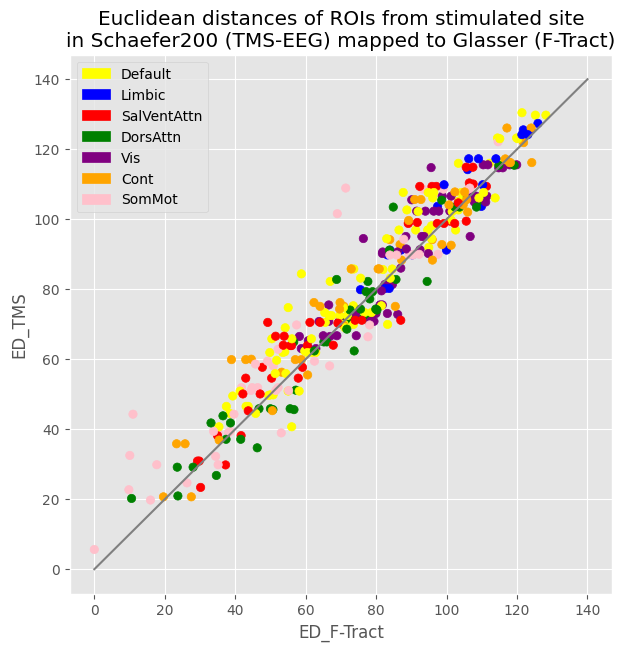

In [315]:
legend_patches = []
for c in color7_dict:
    legend_patches.append(mpatches.Patch(color=color7_dict[c], label=c))

def minmax_norm(x):
    return (x - np.nanmin(x)) / (np.nanmax(x)-np.nanmin(x))

def plot_two_columns(df,col1,col2,label,normalize=True,log_axes=False,labels=False,corr_line=None,title=None,labelx=None,labely=None):
    if normalize:
        a1 = minmax_norm(np.array(df[col1]))
        a2 = minmax_norm(np.array(df[col2]))
    else:
        a1 = np.array(df[col1])
        a2 = np.array(df[col2])
        
    plt.style.use('ggplot')
    fig,ax = plt.subplots(figsize=(7,7))

    if corr_line:
        ax.plot(corr_line[0],corr_line[1],c="gray")
    
    ax.scatter(a1,a2,c=df["color7"])
    ax.legend(handles=legend_patches)

    ax.set_xlabel(col1+"_F-Tract")
    ax.set_ylabel(col2)


    if log_axes:
        ax.set_yscale('log')
        ax.set_xscale('log')
    
    if labels and not log_axes:
        texts = []

        for i, coor in enumerate(zip(a1,a2)):
            x,y = coor
            if np.isnan(x) or np.isnan(y):
                continue

            texts.append(ax.text(x,y,df[label][i],fontsize='x-small'))

        adjust_text(texts, force_text=(0.5,0.5),expand=(1.2,1.2),expand_axes=True,time_lim=5,arrowprops=dict(arrowstyle='-', color='black', lw=0.5))
    
    if labely:
        plt.ylabel(labely)
    if labelx:
        plt.xlabel(labelx)

    if title:
        plt.title(title)
        title_save = (title.replace(" ","_")).replace("\n","_")
        plt.savefig(paths.path_figures(fig_dir+title_save),bbox_inches='tight',pad_inches=0)


title = "Euclidean distances of ROIs from stimulated site\nin Schaefer200 (TMS-EEG) mapped to Glasser (F-Tract)"
plot_two_columns(merged_all,"ED","ED_TMS","regionName",normalize=False,corr_line = [[0,140],[0,140]],title=title)

In [316]:
pg.corr(merged_all["ED"],merged_all["ED_TMS"],method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,360,0.959955,"[0.95, 0.97]",6.454581e-200,nan,1.0


In [317]:
pg.corr(merged_all["ED"],merged_all["ED_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,360,0.959898,"[0.95, 0.97]",8.310161e-200,1.0


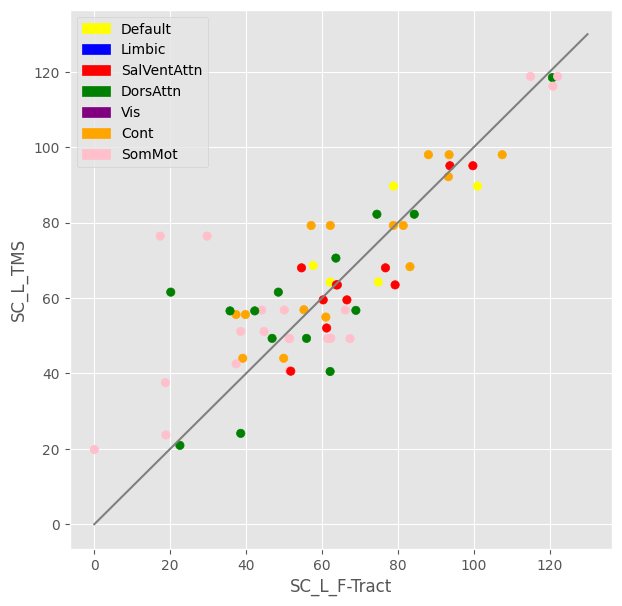

In [318]:
plot_two_columns(merged_all,"SC_L","SC_L_TMS","regionName",normalize=False,corr_line = [[0,130],[0,130]])

In [319]:
pg.pairwise_corr(merged_all,columns=[["SC_L"],["SC_L_TMS"]],method="spearman")

,X,Y,method,alternative,n,r,CI95%,p-unc,power
0,SC_L,SC_L_TMS,spearman,two-sided,360,0.765,"[0.72, 0.8]",2.131541e-70,1.0


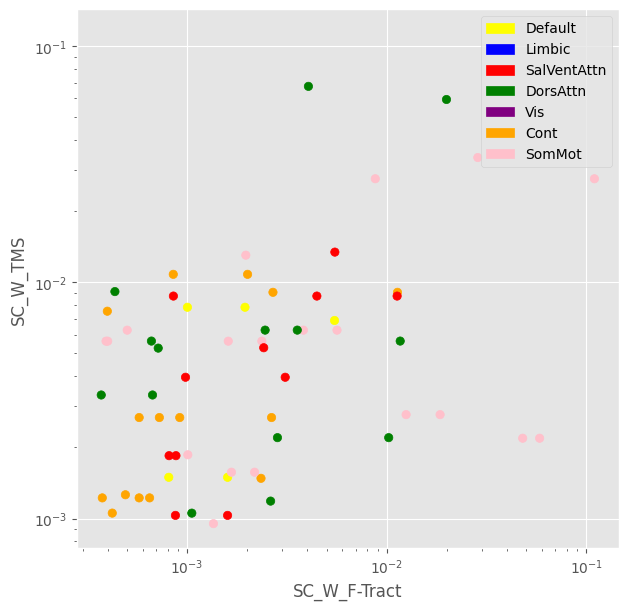

In [320]:
plot_two_columns(merged_all,"SC_W","SC_W_TMS","regionName",normalize=False,log_axes=True)

In [321]:
pg.corr(merged_all["SC_W"],merged_all["SC_W_TMS"],method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,360,0.271714,"[0.17, 0.36]",1.638050e-07,5.61e+04,0.999538


In [322]:
pg.corr(merged_all["SC_W"],merged_all["SC_W_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,360,0.729368,"[0.68, 0.77]",5.474684e-61,1.0


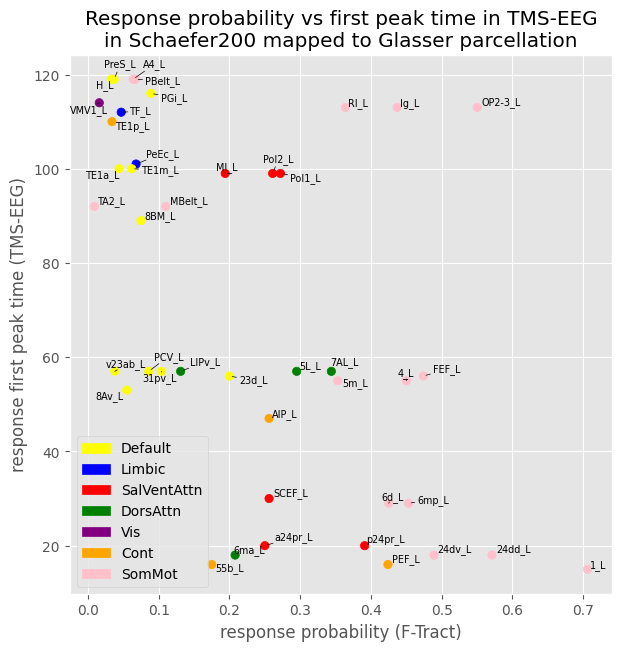

In [323]:
title = f"Response probability vs {AUC_FP} in TMS-EEG\nin Schaefer200 mapped to Glasser parcellation"
plot_two_columns(merged_all,"response","response_TMS","regionName",normalize=False,labels=True,title=title,labelx="response probability (F-Tract)",labely=f"response {AUC_FP} (TMS-EEG)")

In [324]:
pg.corr(merged_all["response"],merged_all["response_TMS"],method="pearson")

,n,r,CI95%,p-val,BF10,power
pearson,43,-0.534328,"[-0.72, -0.28]",0.000224,137.574,0.96768


In [325]:
pg.corr(merged_all["response"],merged_all["response_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,43,-0.562618,"[-0.74, -0.32]",0.000086,0.982391


### Mapping Glasser to Schaefer200

In [326]:
mapping_reverse = pd.read_csv(paths.path('interim/DICE/Schaefer200_Glasser_labelMapping_greedy.csv'),index_col=0)
mapping_reverse = mapping_reverse.reset_index(names=["schaefer"])
mapping_reverse

,schaefer,glasser
0,7Networks_LH_Vis_1,VMV1_L
1,7Networks_LH_Vis_2,V4_L
2,7Networks_LH_Vis_3,PH_L
3,7Networks_LH_Vis_4,V2_L
4,7Networks_LH_Vis_5,V1_L
...,...,...
195,7Networks_RH_Default_PFCdPFCm_6,8Av_R
196,7Networks_RH_Default_PFCdPFCm_7,8Ad_R
197,7Networks_RH_Default_pCunPCC_1,POS1_R
198,7Networks_RH_Default_pCunPCC_2,31pv_R


In [327]:
merged_ftract_dice_r = pd.merge(mapping_reverse,ftract_probabilities,left_on="glasser",right_on="label")
merged_all_reverse = pd.merge(merged_ftract_dice_r,pytepfit_AUC,left_on="schaefer",right_on="roi_name_csv",suffixes=["","_TMS"])
merged_all_reverse["color7"] = merged_all_reverse["schaefer"].apply(lambda x: color7_dict[x.split("_")[2]])
merged_all_reverse[["glasser","schaefer","response","ED","response_TMS","ED_TMS","color7"]]

,glasser,schaefer,response,ED,response_TMS,ED_TMS,color7
0,VMV1_L,7Networks_LH_Vis_1,0.016,68.847152,114.0,66.719168,purple
1,V4_L,7Networks_LH_Vis_2,NaN,82.487126,111.0,81.362718,purple
2,PH_L,7Networks_LH_Vis_3,NaN,71.974313,NaN,73.076780,purple
3,V2_L,7Networks_LH_Vis_4,NaN,81.759962,30.0,77.614687,purple
4,V1_L,7Networks_LH_Vis_5,NaN,86.130607,NaN,98.514321,purple
...,...,...,...,...,...,...,...
195,8BL_R,7Networks_RH_Default_PFCdPFCm_5,NaN,83.003314,NaN,94.439638,yellow
196,8Ad_R,7Networks_RH_Default_PFCdPFCm_7,NaN,84.015017,NaN,83.158747,yellow
197,POS1_R,7Networks_RH_Default_pCunPCC_1,NaN,70.713330,119.0,74.751624,yellow
198,31pv_R,7Networks_RH_Default_pCunPCC_2,NaN,56.079353,57.0,65.834015,yellow


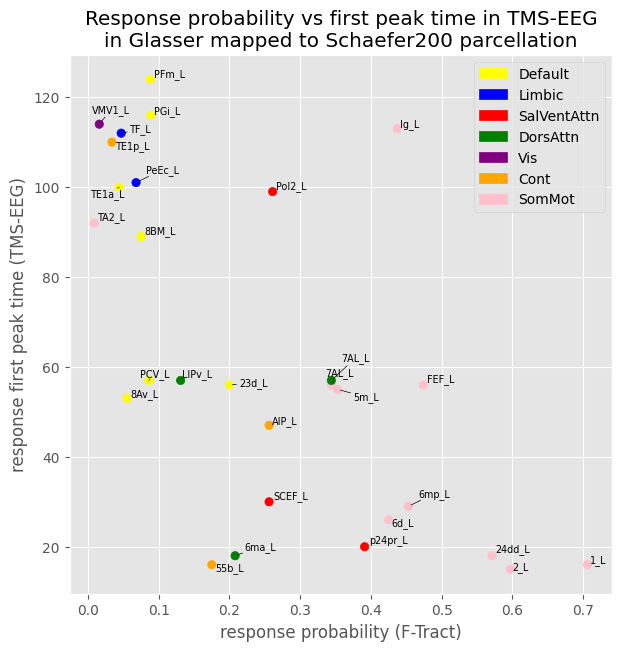

In [328]:
title = f"Response probability vs {AUC_FP} in TMS-EEG\nin Glasser mapped to Schaefer200 parcellation"
plot_two_columns(merged_all_reverse,"response","response_TMS","glasser",normalize=False,labels=True,title=title,labelx="response probability (F-Tract)",labely=f"response {AUC_FP} (TMS-EEG)")

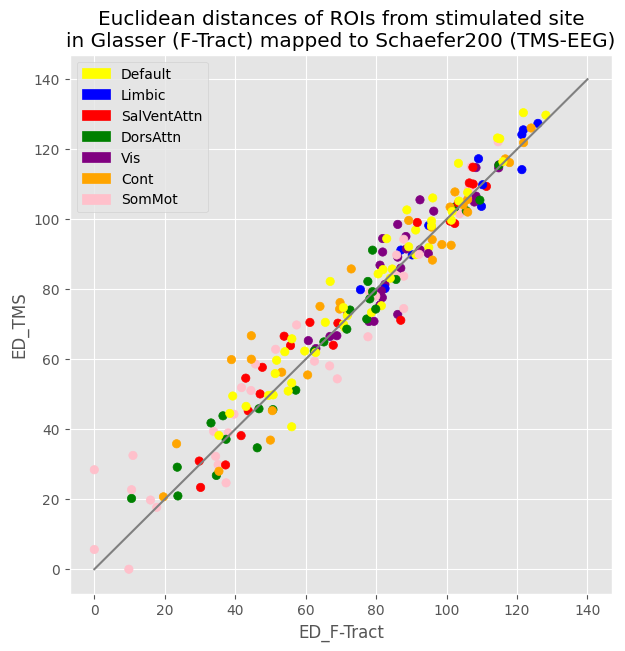

In [329]:
title = "Euclidean distances of ROIs from stimulated site\nin Glasser (F-Tract) mapped to Schaefer200 (TMS-EEG)"
plot_two_columns(merged_all_reverse,"ED","ED_TMS","glasser",normalize=False,corr_line = [[0,140],[0,140]],title=title)

In [330]:
pg.corr(merged_all_reverse["response"],merged_all_reverse["response_TMS"],method="spearman")

,n,r,CI95%,p-val,power
spearman,29,-0.633942,"[-0.81, -0.35]",0.000222,0.971751
